In [3]:
import numpy as np
from dateutil import parser
import sqlite3
from sqlite3 import Error
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [4]:
def fetch_all(conn, query):
    c = conn.cursor()
    c.execute(query)
    return c.fetchall()

In [3]:
def create_connection(db_file):
    conn = None

    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [4]:
def main():
    overview = np.zeros((7, 24))
    fine = np.zeros((119, 7, 24))

    db = create_connection(r"../teams.db")
    entries = fetch_all(db, 'select pub_date,has_duplicated,news_desk_id from publications')

    for entry in entries:
        if not entry[1]:
            dt = parser.parse(entry[0])
            row = dt.weekday()
            column = dt.hour

            overview[row][column] += 1

            if entry[2] != '':
                fine[entry[2]-1][row][column] += 1

    return overview, fine

In [9]:
def plot_heatmap(arr, l):
    matplotlib.rcParams['axes.titlepad'] = 30
    matplotlib.rcParams['axes.labelpad'] = 20
    plt.figure(figsize=(30., 7.))

    ylabels = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.set(
        font_scale=1.2
    )
    ax = sns.heatmap(arr, annot=False, linewidths=.7, yticklabels=ylabels,cbar_kws={
        'label': 'Publications amount'
    })
    ax.set(
        title=l,
        xlabel='Time',
        ylabel='Week days'
    )

    plt.show()

In [6]:
a = main()

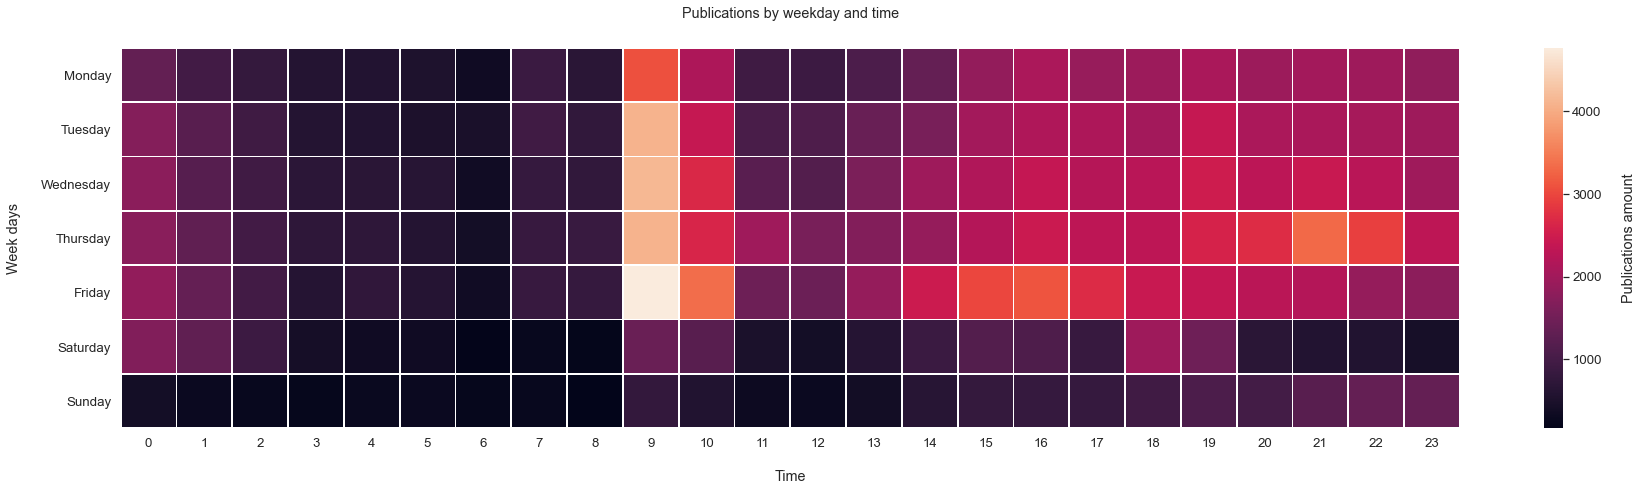

In [10]:
plot_heatmap(a[0], 'Publications by weekday and time')

ValueError: Must pass 2-d input. shape=(119, 7, 24)